<a href="https://colab.research.google.com/github/TVAexe/KPDL-24-25/blob/main/M%C3%B4_h%C3%ACnh_d%E1%BB%B1_%C4%91o%C3%A1n_gi%E1%BB%9Bi_t%C3%ADnh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import datetime

class NaiveBayesGenderClassifier:
    def __init__(self, male_file, female_file):
        self.male_file = male_file
        self.female_file = female_file
        self.vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 4))
        self.model = MultinomialNB()

    def load_data(self):
        # Đọc dữ liệu từ file
        with open(self.male_file, 'r', encoding='utf-8') as file:
            male_names = [line.strip() for line in file.readlines()]

        with open(self.female_file, 'r', encoding='utf-8') as file:
            female_names = [line.strip() for line in file.readlines()]

        # Tạo DataFrame
        male_data = pd.DataFrame({'name': male_names, 'gender': 'Nam'})
        female_data = pd.DataFrame({'name': female_names, 'gender': 'Nu'})
        data = pd.concat([male_data, female_data]).reset_index(drop=True)

        # Gán nhãn số cho giới tính
        data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Nam' else 0)
        return data

    def train(self):
        # Tải dữ liệu và mã hóa tên
        data = self.load_data()
        X = self.vectorizer.fit_transform(data['name'])
        y = data['gender']

        # Chia dữ liệu thành huấn luyện và kiểm thử
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        # Huấn luyện mô hình Naive Bayes
        self.model.fit(X_train, y_train)

        # Đánh giá mô hình
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model Accuracy: {accuracy:.2f}')

    def predict_gender(self, name):
        # Dự đoán giới tính từ tên
        name_vectorized = self.vectorizer.transform([name])
        prediction = self.model.predict(name_vectorized)
        return 'Nam' if prediction[0] == 1 else 'Nu'


In [ ]:
import pandas as pd

# Đường dẫn tới file ngân hàng
bidv = '/content/drive/MyDrive/bidv1.xlsx'
vcb = '/content/drive/MyDrive/vcb_1-30.csv'
viettin1 = '/content/drive/MyDrive/viettin-10.9-15.9.2024.xlsx'
viettin2 = '/content/drive/MyDrive/16.9-29.9.2024.xlsx'

# Đọc dữ liệu từ các file
df_bidv = pd.read_excel(bidv, engine='openpyxl')
tp1 = df_bidv[['Tên', 'Số tiền ghi có (VND)']]  # Chọn nhiều cột cần dùng

df_viettin1 = pd.read_excel(viettin1, engine='openpyxl')
tp2 = df_viettin1[['ten_doi_xung', 'so_tien']]  # Tên cột trong file này

df_viettin2 = pd.read_excel(viettin2, engine='openpyxl')
tp3 = df_viettin2[['Tên đối ứng', 'credit_off']]  # Tên cột trong file này

df_vcb = pd.read_csv(vcb)
tp4 = df_vcb[['Người gửi', 'Số tiền']]  # Tên cột trong file này

# Đổi tên cột để đồng nhất
tp1.columns = ['Tên', 'Số tiền']
tp2.columns = ['Tên', 'Số tiền']
tp3.columns = ['Tên', 'Số tiền']
tp4.columns = ['Tên', 'Số tiền']

# Kết hợp các tên từ các cột thành một DataFrame duy nhất
tp = pd.concat([tp1, tp2, tp3, tp4], ignore_index=True)

# Gộp riêng các file Viettin
tp_viettin = pd.concat([tp2, tp3], ignore_index=True)

# Hiển thị kết quả
print(tp.head())
print(tp_viettin.head())


                 Tên Số tiền
0                NaN  150000
1     TRAN QUANG HUY    1500
2  NGUYEN DANH THONG    6314
3  NGUYEN DANH THONG    4188
4     LE THI KIM ANH   20000
                Tên Số tiền
0    TRAN TIEN ANH   300000
1  LE PHUONG QUYNH   100000
2   TRAN TRONG SON   100000
3  NGUYEN THU BINH   100000
4  NGUYEN THU BINH   100000


In [ ]:
# Tạo đối tượng NaiveBayesGenderClassifier và huấn luyện mô hình
male_file = '/content/drive/MyDrive/Tencontrai.txt'
female_file = '/content/drive/MyDrive/Tencongai.txt'
classifier = NaiveBayesGenderClassifier(male_file, female_file)
classifier.train()

def predict_gender_for_names(names):
    """
    Dự đoán giới tính cho danh sách các tên.
    Trả về danh sách kết quả, với các giá trị "male", "female", hoặc "unknown".
    """
    results = []
    for name in names:
        if pd.isna(name) or name == "" or isinstance(name, (int, float)):
            results.append("unknown")
        else:
            gender = classifier.predict_gender(str(name))  # Chuyển tên sang chuỗi trước khi dự đoán
            results.append(gender if gender is not None else "unknown")
    return results

# Áp dụng hàm dự đoán cho từng bộ dữ liệu
result = predict_gender_for_names(tp['Tên'])
result1 = predict_gender_for_names(tp1['Tên'])
result_viettin = predict_gender_for_names(tp_viettin['Tên'])
result4 = predict_gender_for_names(tp4['Tên'])




Model Accuracy: 0.83
Kết quả dự đoán giới tính cho toàn bộ dữ liệu:
['unknown', 'Nam', 'Nu', 'Nu', 'Nu']
Kết quả dự đoán giới tính cho tp1:
['unknown', 'Nam', 'Nu', 'Nu', 'Nu']
Kết quả dự đoán giới tính cho tp_viettin:
['Nu', 'Nu', 'Nam', 'Nu', 'Nu']
Kết quả dự đoán giới tính cho tp4:
['unknown', 'Nam', 'Nam', 'Nam', 'Nu']


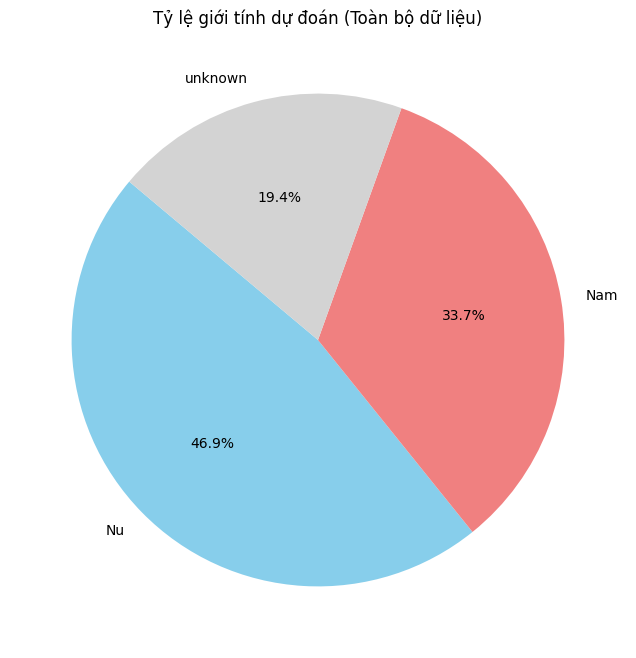

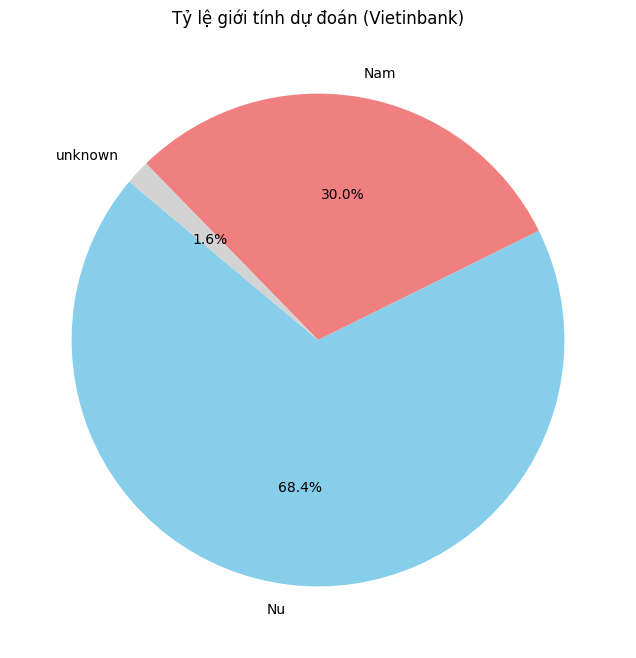

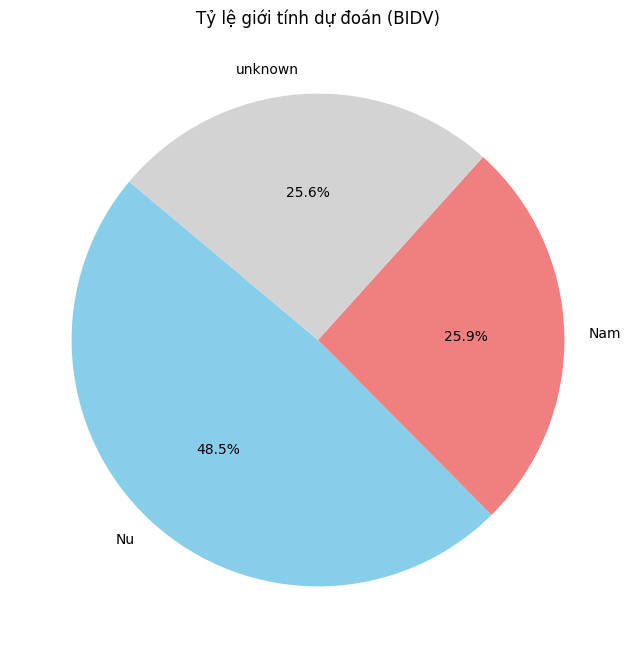

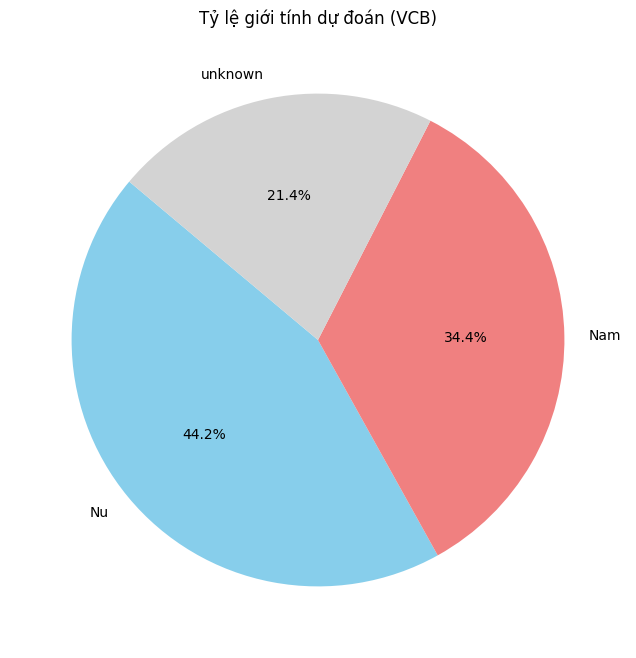

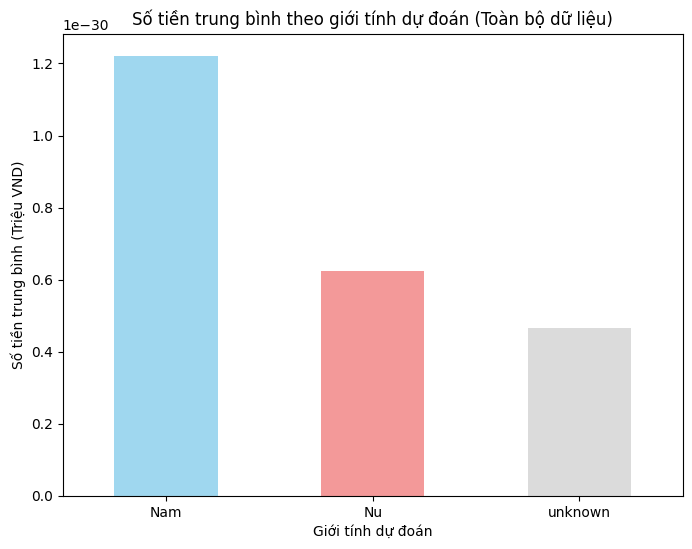

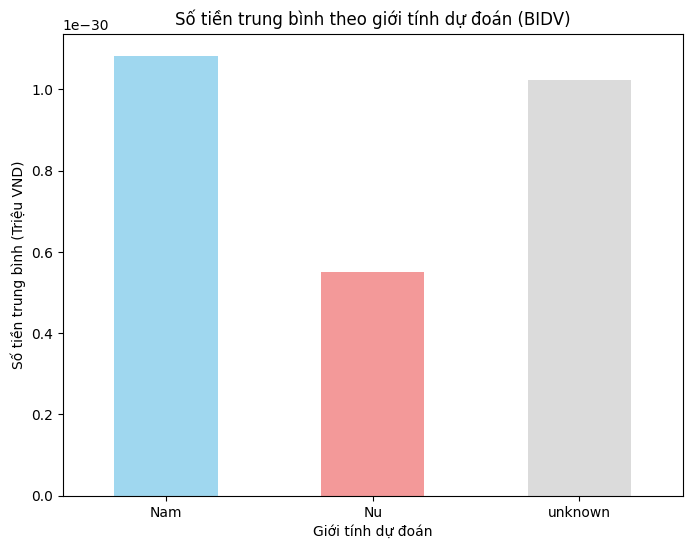

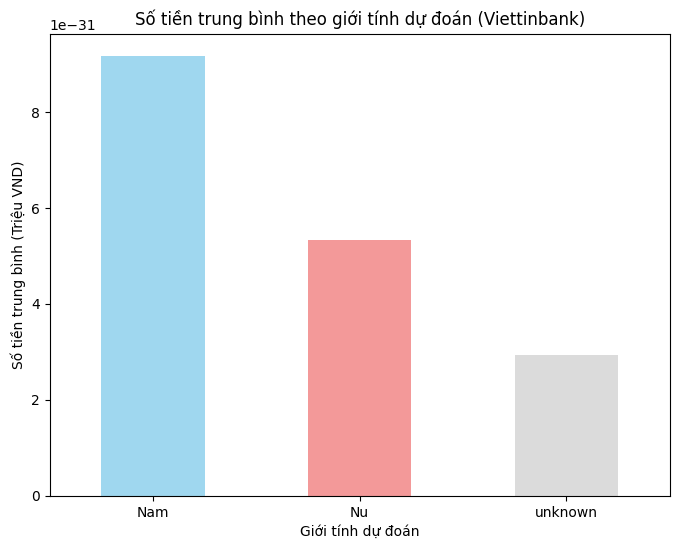

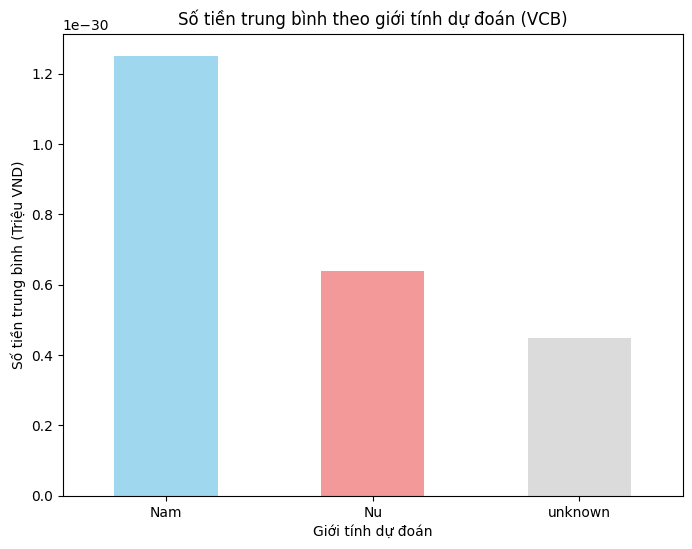

In [ ]:
import matplotlib.pyplot as plt

# Chuyển cột "Số tiền" thành kiểu số (numeric), bỏ qua lỗi nếu có
tp.loc[:, 'Số tiền'] = pd.to_numeric(tp['Số tiền'], errors='coerce')
tp1.loc[:, 'Số tiền'] = pd.to_numeric(tp1['Số tiền'], errors='coerce')
tp_viettin.loc[:, 'Số tiền'] = pd.to_numeric(tp_viettin['Số tiền'], errors='coerce')
tp4.loc[:, 'Số tiền'] = pd.to_numeric(tp4['Số tiền'], errors='coerce')

# Chuyển đổi cột "Số tiền" từ VND sang triệu VND
tp.loc[:, 'Số tiền'] = tp['Số tiền'] / 1e6
tp1.loc[:, 'Số tiền'] = tp1['Số tiền'] / 1e6
tp_viettin.loc[:, 'Số tiền'] = tp_viettin['Số tiền'] / 1e6
tp4.loc[:, 'Số tiền'] = tp4['Số tiền'] / 1e6

# Tạo DataFrame từ kết quả dự đoán
result_chung = pd.DataFrame({'Tên': tp['Tên'], 'Giới tính dự đoán': result, 'Số tiền': tp['Số tiền']})
result_bidv = pd.DataFrame({'Tên': tp1['Tên'], 'Giới tính dự đoán': result1, 'Số tiền': tp1['Số tiền']})
result_viettinbank = pd.DataFrame({'Tên': tp_viettin['Tên'], 'Giới tính dự đoán': result_viettin, 'Số tiền': tp_viettin['Số tiền']})
result_vcb = pd.DataFrame({'Tên': tp4['Tên'], 'Giới tính dự đoán': result4, 'Số tiền': tp4['Số tiền']})

# Tính toán tỷ lệ giới tính dự đoán trong toàn bộ dữ liệu và vẽ biểu đồ tròn
gender_counts = result_chung['Giới tính dự đoán'].value_counts()
gender_counts_viettinbank=result_viettinbank['Giới tính dự đoán'].value_counts()
gender_counts_bidv=result_bidv['Giới tính dự đoán'].value_counts()
gender_counts_vcb=result_vcb['Giới tính dự đoán'].value_counts()
# Vẽ biểu đồ tròn cho giới tính dự đoán (Toàn bộ dữ liệu)
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgrey']
)
plt.title('Tỷ lệ giới tính dự đoán (Toàn bộ dữ liệu)')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts_viettinbank,
    labels=gender_counts_viettinbank.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgrey']
)
plt.title('Tỷ lệ giới tính dự đoán (Vietinbank)')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts_bidv,
    labels=gender_counts_bidv.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgrey']
)
plt.title('Tỷ lệ giới tính dự đoán (BIDV)')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts_vcb,
    labels=gender_counts_vcb.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgrey']
)
plt.title('Tỷ lệ giới tính dự đoán (VCB)')
plt.show()
# Tính số tiền trung bình cho từng giới tính
average_amount_chung = result_chung.groupby('Giới tính dự đoán')['Số tiền'].mean()
average_amount_bidv = result_bidv.groupby('Giới tính dự đoán')['Số tiền'].mean()
average_amount_viettinbank = result_viettinbank.groupby('Giới tính dự đoán')['Số tiền'].mean()
average_amount_vcb = result_vcb.groupby('Giới tính dự đoán')['Số tiền'].mean()



# Vẽ biểu đồ cột cho số tiền trung bình theo giới tính
plt.figure(figsize=(8, 6))
average_amount_chung.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgrey'], alpha=0.8)
plt.title('Số tiền trung bình theo giới tính dự đoán (Toàn bộ dữ liệu)')
plt.ylabel('Số tiền trung bình (Triệu VND)')
plt.xlabel('Giới tính dự đoán')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ cột cho số tiền trung bình theo giới tính cho từng nhóm
plt.figure(figsize=(8, 6))
average_amount_bidv.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgrey'], alpha=0.8)
plt.title('Số tiền trung bình theo giới tính dự đoán (BIDV)')
plt.ylabel('Số tiền trung bình (Triệu VND)')
plt.xlabel('Giới tính dự đoán')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
average_amount_viettinbank.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgrey'], alpha=0.8)
plt.title('Số tiền trung bình theo giới tính dự đoán (Viettinbank)')
plt.ylabel('Số tiền trung bình (Triệu VND)')
plt.xlabel('Giới tính dự đoán')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
average_amount_vcb.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgrey'], alpha=0.8)
plt.title('Số tiền trung bình theo giới tính dự đoán (VCB)')
plt.ylabel('Số tiền trung bình (Triệu VND)')
plt.xlabel('Giới tính dự đoán')
plt.xticks(rotation=0)
plt.show()
